# Prática 2

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere os dados de fechamento do papel PETR4 a partir de 18/3 no arquivo PETR4.SA.csv.
(fonte dos dados completos, nesta prática utilizaremos uma parte deles: https://br.financas.yahoo.com/quote/PETR4.SA/history/)


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 2 a esses dados, a saber:

- Método de Holt

- Método de Holt-Winters

- Previsão 

- Estacionariedade


Carregue as bibliotecas

In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


**1. Faça a leitura dos dados a partir do arquivo PETR4.SA.csv disponível no material do curso. Para essa análise, utilizaremos a variável que indica os fechamentos, Close. Quantas observações tem a série original? Visualize a série Close.**

In [2]:
pkgdir = '.\data'

# PETR4 - Leitura dos dados
PETR4 = pd.read_csv(f'{pkgdir}/PETR4.csv', index_col='Date', parse_dates=True)

PETR4.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200


In [3]:
len(PETR4)

84

<AxesSubplot:xlabel='Date'>

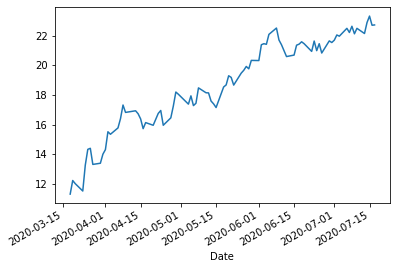

In [4]:
PETR4['Close'].plot()

**2. Quais as datas mínima e máxima de observação da série Close? Repita o procedimento feito em aula para preencher os dados faltantes com a função PETR4.fillna(method='ffill', inplace=True). Nesse caso, a frequência usada em pd.date_range deve ser 'B' pois a bolsa de valores não funciona aos fins de semana. O que faz o método ffill de fillna?**

In [5]:
PETR4.index.min()

Timestamp('2020-03-18 00:00:00')

In [6]:
PETR4.index.max()

Timestamp('2020-07-17 00:00:00')

In [7]:
idx = pd.date_range(start=PETR4.index.min(), end=PETR4.index.max(), freq='B')
idx

DatetimeIndex(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
      

In [8]:
PETR4 = PETR4.reindex(idx)
PETR4.head()

,Open,High,Low,Close,Adj Close,Volume
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0


In [9]:
PETR4.fillna(method='ffill', inplace=True)

**3. Qual o novo número de observações da série Close após o procedimento em 2.?**

In [10]:
len(PETR4)

88

**4. Vamos aplicar os métodos de Holt e Holt-Winters para esses dados. Faça a leitura das bibliotecas necessárias e crie a série Holt na base de dados. Atribua a ela os valores ajustados pelo Método de Holt. Lembre-se que a série fica deslocada e corrija com a função shift(-1).**

In [11]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo =  ExponentialSmoothing(PETR4['Close'], trend='add');

ajustadoH = modelo.fit();

PETR4['Holt'] = ajustadoH.fittedvalues.shift(-1);

PETR4.head()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Open,High,Low,Close,Adj Close,Volume,Holt
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0,11.441651
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0,12.209521
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0,12.166389
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0,11.744351
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0,13.123704


**5. Visualize as séries Close e Holt. O método apresenta um bom ajuste?**

<AxesSubplot:>

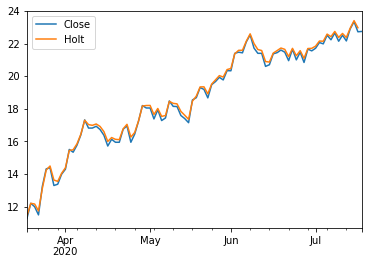

In [12]:
PETR4[['Close','Holt']].plot()

**6. Faz sentido ajustar o método de Holt-Winters? Qual seria o período da sazonalidade? 7 dias pode fazer sentido? Aplique os métodos de Holt-Winters com sazonalidade aditiva e multiplicativa e visualize os resultados.**

In [13]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva
from statsmodels.tsa.api import ExponentialSmoothing
modelo =  ExponentialSmoothing(PETR4['Close'],trend='add',seasonal='add',seasonal_periods=7);

ajustadoHW = modelo.fit();

PETR4['Holt-Winters-adit-7'] = ajustadoHW.fittedvalues;

PETR4.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-7
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0,11.441651,11.290081
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0,12.209521,11.883815
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0,12.166389,12.260744
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0,11.744351,12.086928
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0,13.123704,11.722513


<AxesSubplot:>

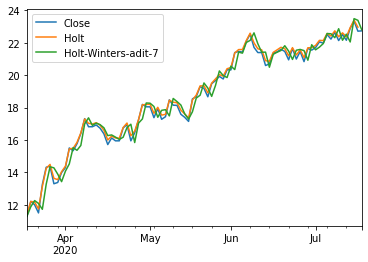

In [14]:
PETR4[['Close','Holt','Holt-Winters-adit-7']].plot()

In [15]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(PETR4['Close'],trend='add',seasonal='mul',seasonal_periods=7);

ajustadoHW = modelo.fit();

PETR4['Holt-Winters-mul-7'] = ajustadoHW.fittedvalues;

PETR4.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-7,Holt-Winters-mul-7
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0,11.441651,11.290081,11.289973
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0,12.209521,11.883815,11.705481
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0,12.166389,12.260744,12.281294
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0,11.744351,12.086928,12.122538
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0,13.123704,11.722513,11.633683


<AxesSubplot:>

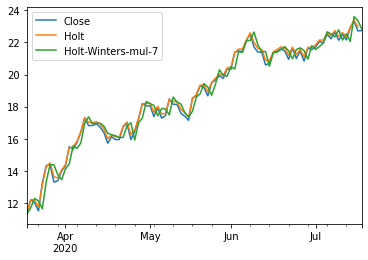

In [16]:
PETR4[['Close','Holt','Holt-Winters-mul-7']].plot()

**7. Olhe as previsões para as últimas 40 observações**

<AxesSubplot:>

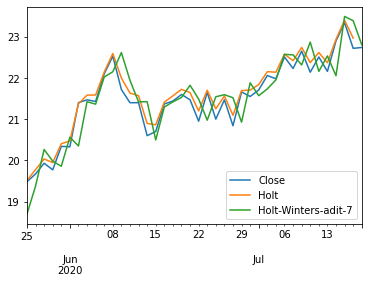

In [17]:
PETR4[['Close','Holt','Holt-Winters-adit-7']][-40:].plot()

**8. Como ficam as previsões? Use cerca de 80% da base para treino e 20% para teste, ou seja, 70 observações para treino e 18 observações para teste.**

In [18]:
dados_treino = PETR4.iloc[:70] # Dados de treinamento até observação 210, sem incluí-la
dados_teste = PETR4.iloc[70:] # Dados de teste a partir da observação 210

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


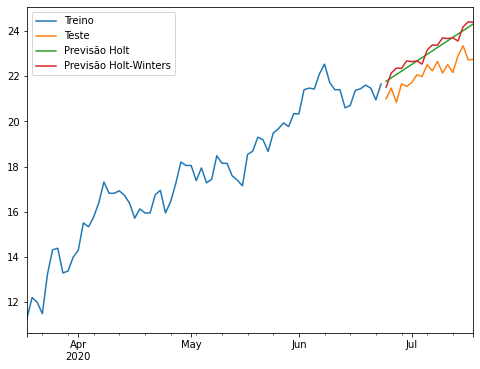

In [19]:
ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='add',seasonal_periods=7).fit()

predito_H = ajustado_H.forecast(18).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(18).rename('Previsão Holt')

predito_H.index = PETR4.index[70:]
predito_HW.index = PETR4.index[70:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**9. É possível melhorar as previsões com o método de Holt-Winters com sazonalidade e/ou tendência multiplicativos?**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


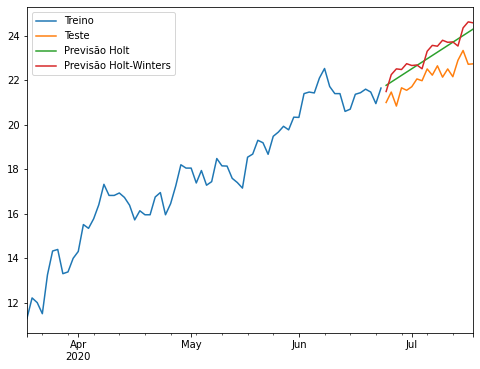

In [20]:
ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='mul',seasonal_periods=7).fit()

predito_H = ajustado_H.forecast(18).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(18).rename('Previsão Holt')

predito_H.index = PETR4.index[70:]
predito_HW.index = PETR4.index[70:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


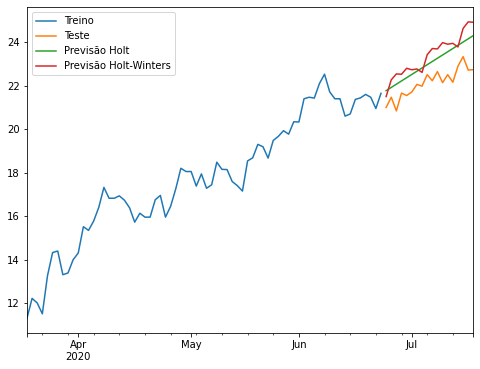

In [21]:

ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

predito_H = ajustado_H.forecast(18).rename('Previsão Holt')
predito_HW = ajustado_HW.forecast(18).rename('Previsão Holt')

predito_H.index = PETR4.index[70:]
predito_HW.index = PETR4.index[70:]

dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');
predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**10. Utilize os métodos de Holt e Holt-Winters e compare os erros quadráticos médios e erros absolutos médios. (Depois você pode repetir para os dados de COVID-19).**

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
mean_squared_error(dados_teste['Close'],predito_HW)

In [ ]:
mean_absolute_error(dados_teste['Close'], predito_HW)

In [ ]:
mean_squared_error(dados_teste['Close'],predito_H)

In [ ]:
mean_absolute_error(dados_teste['Close'], predito_H)

**11. Crie séries da média móvel simples e desvio padrão móvel com janelas de 7 dias. A série parece estacionária?**

In [ ]:
# Verificando as séries de média e desvio-padrão móvel com janela de 7 dias

PETR4['MMS-7'] = PETR4['Close'].rolling(window=7).mean()
PETR4['DP-7'] = PETR4['Close'].rolling(window=7).std()

PETR4[['Close','MMS-7','DP-7']].plot();

A série não parece estacionária.

**12. A série das primeiras diferenças parece estacionária?.**

In [ ]:
# Primeiras diferenças
y = np.diff(PETR4['Close'])
x = PETR4.iloc[1:].index

plt.plot(x,y);

**13. Considere boxplots semanais para a série original. Ela parece estacionária?**

In [ ]:
import seaborn as sns

PETR4['Week'] = PETR4.index.week

sns.boxplot(x=PETR4['Week'], y=PETR4['Close'])

**14. Utilize o Teste de Dickey-Fuller aumentado. Que evidências ele dá sobre a estacionariedade da série e da primeira diferença?**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(PETR4['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(np.diff(PETR4['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))